In [1]:
import mysql.connector as sql
import pandas as pd
from configparser import ConfigParser


In [2]:
parser = ConfigParser()
parser.read('gcloud.conf')

host  =  parser.get('db', 'host')
db    =  parser.get('db', 'db')
user  =  parser.get('db', 'user')
passw =  parser.get('db', 'user')


db_connection = sql.connect(host=host, database=db, user=user, password=passw)
db_cursor = db_connection.cursor()
query = "SELECT * FROM all_physical limit 100"


In [3]:
pdata = pd.read_sql(query, db_connection)

In [4]:
pdata.iloc[:, :-1].describe()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
unique,100,89,59,1,1,1,3,11,10,22,...,19,1,1,25,4,21,1,1,1,1
top,28/12/2015 10:00:26 AM,2.554847,525.5944,2,2,1,262.0161,8.391951,328.6337,2.439881,...,0.3065689,2,1,250.9933,1.649953,189.8872,0.000128152,1,1,1
freq,1,3,6,100,100,100,85,32,28,26,...,29,100,100,17,78,14,100,100,100,100


In [5]:
catFeatures = []
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)
print(len(NumFeatures), "Continuous Features \n", NumFeatures)
print("\n \n")
print(len(catFeatures), "Categorical features \n\n\n", catFeatures)


NumFeatures.remove("Timestamp")
print("\n \n")

print(len(NumFeatures), "Upadated List of Continuous Features \n", NumFeatures)
print("\n \n")

52 Continuous Features 
 ['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603']

 

1 Categorical features 


 ['EVENT']

 

51 Upadated List of Continuous Features 
 ['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT5

In [6]:
pdata.isnull().values.any()
data_cor = pdata[NumFeatures].corr()
# Set the threshold and add to pairs to list
t = 0.8
cor_list = []


In [7]:
pdata[NumFeatures]


,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.3077859,2,1,250.8652,1.649953,189.5988,0.000128152,1,1,1
1,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.3077859,2,1,250.8652,1.649953,189.6789,0.000128152,1,1,1
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.3086186,2,1,250.8812,1.649953,189.6789,0.000128152,1,1,1
3,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.3086186,2,1,250.8812,1.649953,189.6148,0.000128152,1,1,1
4,2.56926,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,0.3086186,2,1,250.8812,1.649953,189.5027,0.000128152,1,1,1
5,2.609294,523.8673,2,2,1,262.0161,8.394514,328.6337,2.44411,2,...,0.3086186,2,1,250.753,1.649953,189.5027,0.000128152,1,1,1
6,2.637158,524.1028,2,2,1,262.0161,8.394514,328.6337,2.44411,2,...,0.3086186,2,1,250.5928,1.649953,189.5027,0.000128152,1,1,1
7,2.652211,524.2206,2,2,1,262.0161,8.394514,328.6337,2.441803,2,...,0.3086186,2,1,250.5928,1.649953,189.5027,0.000128152,1,1,1
8,2.655735,524.4954,2,2,1,262.0161,8.394514,328.6337,2.441803,2,...,0.3086186,2,1,250.9132,1.649953,189.5027,0.000128152,1,1,1
9,2.64997,524.0636,2,2,1,262.0161,8.394514,328.6337,2.441803,2,...,0.3084905,2,1,250.9132,1.649953,189.5668,0.000128152,1,1,1


In [8]:
pdata[NumFeatures] = pdata[NumFeatures].apply(pd.to_numeric)

# Statistics for the data
### Mean, Median snd Std. dev. etc.

In [9]:
pdata[NumFeatures].describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.0,...,100.000000,100.0,100.0,100.000000,100.000000,100.000000,1.000000e+02,100.0,100.0,100.0
mean,2.549409,524.930270,2.0,2.0,1.0,262.020272,8.391832,328.495526,2.441152,2.0,...,0.307095,2.0,1.0,251.049238,1.645308,189.775384,1.281520e-04,1.0,1.0,1.0
std,0.077176,1.431069,0.0,0.0,0.0,0.039879,0.001741,0.102734,0.001613,0.0,...,0.000801,0.0,0.0,0.254952,0.024868,0.227891,1.634496e-19,0.0,0.0,0.0
min,2.420011,522.532700,2.0,2.0,1.0,261.984100,8.389067,328.351700,2.437318,2.0,...,0.306441,2.0,1.0,250.544700,1.569859,189.342500,1.281520e-04,1.0,1.0,1.0
25%,2.487269,524.004675,2.0,2.0,1.0,262.016100,8.390669,328.403000,2.439881,2.0,...,0.306569,2.0,1.0,250.905200,1.649953,189.610800,1.281520e-04,1.0,1.0,1.0
50%,2.555488,524.770150,2.0,2.0,1.0,262.016100,8.391951,328.428600,2.440906,2.0,...,0.306569,2.0,1.0,251.041400,1.649953,189.775100,1.281520e-04,1.0,1.0,1.0
75%,2.617141,525.614025,2.0,2.0,1.0,262.016100,8.392271,328.633700,2.441803,2.0,...,0.307802,2.0,1.0,251.185600,1.649953,189.887200,1.281520e-04,1.0,1.0,1.0
max,2.673029,528.224400,2.0,2.0,1.0,262.208400,8.396437,328.633700,2.445391,2.0,...,0.308619,2.0,1.0,251.506000,1.681991,190.143600,1.281520e-04,1.0,1.0,1.0


In [10]:
pdata['EVENT'] = pdata['EVENT'].astype('category')

In [11]:
pdata['EVENT'].dtype

category

# Target Variable

In [ ]:
import matplotlib.pyplot as plt


%matplotlib inline
###Distribution on Loss Value 
P = plt.figure(figsize = (15,10))
H = plt.hist(pdata["EVENT"])
plt.xlabel("Event")
plt.ylabel("Count")
plt.title("Histogram for Attacks")

# Features with Correlation Higher Than .7

In [13]:
data_cor = pdata[NumFeatures].corr()
# Set the threshold and add to pairs to list
t = 0.7
cor_list = []

#Find Pairs and update cor_list
for i in range(0,51):
    for j in range(i+1,51):
        if (data_cor.iloc[i,j] >= t and data_cor.iloc[i,j] < 1) or (data_cor.iloc[i,j] < 0 and data_cor.iloc[i,j] <= -t):
            cor_list.append([data_cor.iloc[i,j],i,j])

#Sort by corr coef
sorted_list = sorted(cor_list,key=lambda x: -abs(x[0]))

for v,i,j in sorted_list:
    print ("%s and %s = %.5f" % (NumFeatures[i],NumFeatures[j],v))



AIT401 and FIT601 = -1.00000
PIT501 and PIT503 = 0.96220
FIT501 and PIT501 = 0.89266
FIT501 and PIT503 = 0.86811
LIT301 and AIT503 = -0.80033
LIT101 and AIT503 = -0.79280
LIT101 and LIT401 = 0.78472
LIT301 and LIT401 = 0.77102
LIT401 and AIT503 = -0.76765
FIT401 and PIT503 = 0.73171
FIT401 and PIT501 = 0.70464


In [14]:
hi_corr_features = []
for v,i,j in sorted_list:
    hi_corr_features.append(i)
    hi_corr_features.append(j)
    
hi_corr_features = list(set(hi_corr_features))

# Histograms for features with highest correlations 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f711648f128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7116f32da0>]], dtype=object)

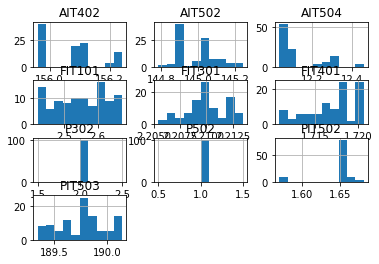

In [48]:
pdata.iloc[:,hi_corr_features].hist()

(0.0, 1.0)

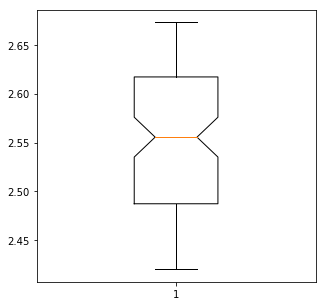

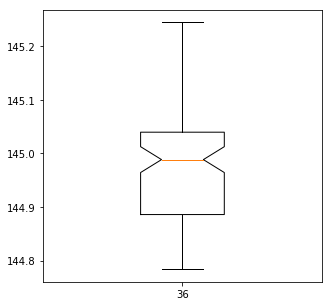

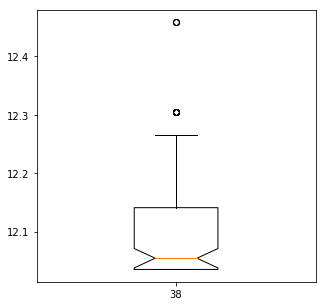

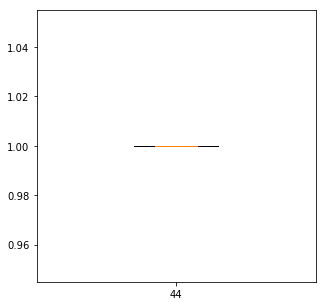

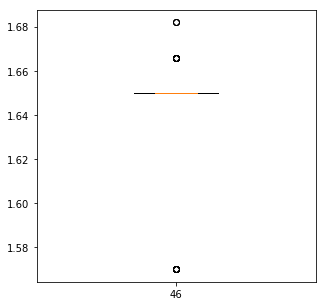

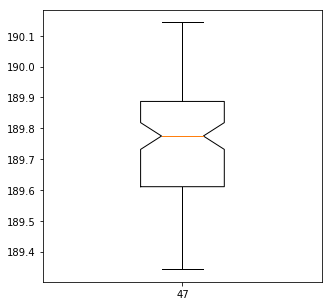

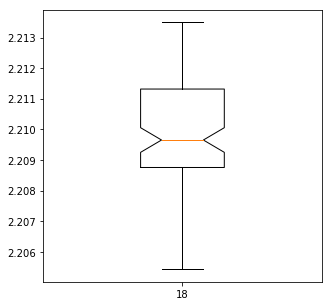

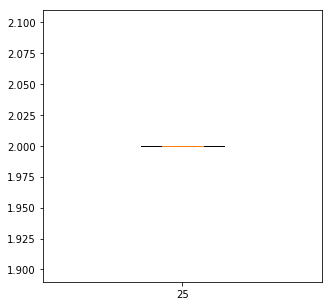

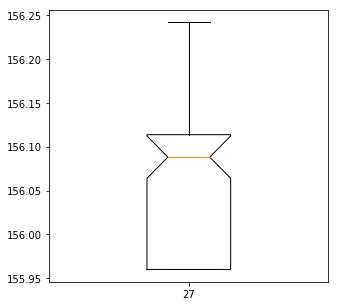

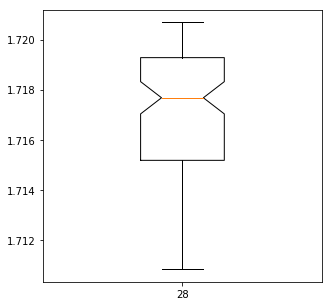

In [112]:
import matplotlib.ticker as ticker
for i in hi_corr_features:
    fig, axes = plt.subplots(figsize=(5,  5))
    plt.boxplot(pdata.iloc[:,i], widths = 0.3, notch=True, positions = [i])